<a href="https://colab.research.google.com/github/Anavi07/AudioSpotting/blob/main/FSDD_MS_All_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
# Paths
main_dir = '/content/free-spoken-digit-dataset'  # Path to FSDD
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)

# Clone the dataset if not already cloned
if not os.path.exists(main_dir):
    !git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git


Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212 (from 1)
Receiving objects: 100% (4260/4260), 30.38 MiB | 25.93 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [6]:
# PROCESSING
# Feature extraction methods

# def CalculateZeroCrossingRate(file_location):
#     y, sr = librosa.load(file_location)
#     zCross = librosa.feature.zero_crossing_rate(y=y)
#     dim = (32, 32)
#     resized = cv2.resize(zCross, dim, interpolation = cv2.INTER_AREA)
#     return resized

def CalculateMelSpectrogram(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.melspectrogram(y=y, sr=sr)
    melSpec_dB = librosa.power_to_db(melSpec)
    dim = (32, 32)
    resized = cv2.resize(melSpec_dB, dim, interpolation = cv2.INTER_AREA)
    return resized


def CalculateMFCC(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.mfcc(y=y, sr=sr)
    dim = (32, 32)
    resized = cv2.resize(melSpec, dim, interpolation = cv2.INTER_AREA)
    return resized



In [7]:
cd /content

/content


In [8]:
'''for i in range(10):
  j = '/content/dataset'
  print(os.listdir(j))
  for k in os.listdir(j):
    print(k)
    if ".DS_" in k:
      continue

    for t in os.listdir(j+"/"+k):
      #print("path = ", os.listdir(j+"/"+k))
      if ".DS_" in k:
        continue
      print(t.split("WA")[1].split(".")[0])
      #print(t.split("D")[1][0])
      break
    break
  break '''

'for i in range(10):\n  j = \'/content/dataset\'\n  print(os.listdir(j))\n  for k in os.listdir(j):\n    print(k)\n    if ".DS_" in k:\n      continue\n\n    for t in os.listdir(j+"/"+k):\n      #print("path = ", os.listdir(j+"/"+k))\n      if ".DS_" in k:\n        continue\n      print(t.split("WA")[1].split(".")[0])\n      #print(t.split("D")[1][0])\n      break\n    break\n  break '

In [9]:
# Paths
main_dir = '/content/free-spoken-digit-dataset'  # Path to the main dataset folder
recordings_dir = os.path.join(main_dir, 'recordings')  # Path to the 'recordings' folder
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)


## No need to rerun if already processed

# # Processing
# x = []
# y = []

# # Loop through the 'recordings' folder
# for file_name in os.listdir(recordings_dir):
#     if not file_name.endswith('.wav'):
#         continue

#     file_path = os.path.join(recordings_dir, file_name)

#     try:
#         # Extract Mel Spectrogram features
#         x.append(CalculateMelSpectrogram(file_path))

#         # Extract label from the file name (e.g., "0_george_0001.wav" -> label = 0)
#         label = int(file_name.split('_')[0])
#         y.append(label)
#     except Exception as e:
#         print(f"Error processing {file_name}: {e}")

# # Convert to NumPy arrays
# x = np.array(x)
# y = np.array(y)

# # Verify data
# if x.size == 0 or y.size == 0:
#     raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# # Save processed data
# np.save(os.path.join(files_path, "X_melspectrogram.npy"), x)
# np.save(os.path.join(files_path, "Y_melspectrogram.npy"), y)

# print(f"Processing completed. Processed data saved in {files_path}.")

In [17]:
# Paths
main_dir = '/content/free-spoken-digit-dataset'  # Path to the main dataset folder
recordings_dir = os.path.join(main_dir, 'recordings')  # Path to the 'recordings' folder
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)

# Processing
x = []
y = []

# Loop through the 'recordings' folder
for file_name in os.listdir(recordings_dir):
    if not file_name.endswith('.wav'):
        continue

    file_path = os.path.join(recordings_dir, file_name)

    try:
        # Extract Mel Spectrogram features
        x.append(CalculateMFCC(file_path))

        # Extract label from the file name (e.g., "0_george_0001.wav" -> label = 0)
        label = int(file_name.split('_')[0])
        y.append(label)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Convert to NumPy arrays
x = np.array(x)
y = np.array(y)

# Verify data
if x.size == 0 or y.size == 0:
    raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# Save processed data
np.save(os.path.join(files_path, "X_mfcc.npy"), x)
np.save(os.path.join(files_path, "Y_mfcc.npy"), y)

print(f"Processing completed. Processed data saved in {files_path}.")

Processing completed. Processed data saved in /content/drive/MyDrive/processed_data/fsdd.


In [10]:
#load files
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

x_melspectrogram = np.load(files_path+"/X_melspectrogram.npy", allow_pickle=True)
# x_zero_crossing_rate = np.load(files_path+"/X_zero_crossing_rate.npy", allow_pickle=True)
x_mfcc = np.load(files_path+"/X_mfcc.npy", allow_pickle=True)
y_melspectrogram = np.load(files_path+"/Y_melspectrogram.npy", allow_pickle=True)
# y_zero_crossing_rate = np.load(files_path+"/y_zero_crossing_rate.npy", allow_pickle=True)
y_mfcc = np.load(files_path+"/Y_mfcc.npy", allow_pickle=True)

In [ ]:
# #Split data into train and test

# from sklearn.model_selection import train_test_split
# x = x_mfcc
# y = y_mfcc

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_mfcc_train",x_train)
# np.save(files_path+"/y_mfcc_train",y_train)
# np.save(files_path+"/x_mfcc_test",x_test)
# np.save(files_path+"/y_mfcc_test",y_test)

In [11]:
from sklearn.model_selection import train_test_split
x = x_melspectrogram
y = y_melspectrogram

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
np.save(files_path+"/x_melspectrogram_train",x_train)
np.save(files_path+"/y_melspectrogram_train",y_train)
np.save(files_path+"/x_melspectrogram_test",x_test)
np.save(files_path+"/y_melspectrogram_test",y_test)

In [ ]:

# from sklearn.model_selection import train_test_split
# x = x_zero_crossing_rate
# y = y_zero_crossing_rate

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_zero_crossing_rate_train",x_train)
# np.save(files_path+"/y_zero_crossing_rate_train",y_train)
# np.save(files_path+"/x_zero_crossing_rate_test",x_test)
# np.save(files_path+"/y_zero_crossing_rate_test",y_test)

In [12]:
import tensorflow as tf
import numpy as np

files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

features = ['melspectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[0]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[0]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[0]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[0]),allow_pickle=True)

In [13]:
print(np.unique(y_melspectrogram))

[0 1 2 3 4 5 6 7 8 9]


In [14]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelBinarizer

In [20]:
# Assuming y_train and y_test contain the labels for training and testing data
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)

In [21]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


## ResNet50

In [23]:
# Resize and convert the data from grayscale to RGB
x_train_resized = tf.image.resize(x_train, (224, 224))  # Resize to 224x224
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)  # Convert to 3 channels

x_test_resized = tf.image.resize(x_test, (224, 224))
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized)  # Convert to 3 channels

# Verify the shapes of the transformed data
print(f"x_train_rgb shape: {x_train_rgb.shape}")
print(f"x_test_rgb shape: {x_test_rgb.shape}")

# Function to create a ResNet50 model for audio digit classification
def GetResNet50():
    # Load the ResNet50 architecture without the top classification layer
    base_model = applications.ResNet50(
        include_top=False,
        weights=None,  # No pretrained weights since this is specific to audio digits
        input_shape=(224, 224, 3)  # Adjusted input shape for ResNet50
    )

    # Add custom classification layers on top of ResNet50
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))  # Fully connected layer
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digit classification

    return model

x_train_rgb shape: (2400, 224, 224, 3)
x_test_rgb shape: (600, 224, 224, 3)


In [26]:
save_path = '/content/drive/MyDrive/saved files/fsdd/models'

# Create the ResNet50 model
resnet_model = GetResNet50()
print(resnet_model.summary())

# Compile the model
resnet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
)

# Define the model checkpoint callback
callbacks = ModelCheckpoint(
    save_path + "/resnet50_melspectrogram_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Print shapes of input and output
print("X train shape = ", x_train_rgb.shape)
print("y train shape = ", train_y.shape)

# Train the model
history = resnet_model.fit(
    x_train_rgb, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

# Evaluate on the test set
# Uncomment if you wish to evaluate after training
# resnet_model = tf.keras.models.load_model(save_path + "/resnet50_melspectrogram_model.keras")
# print("Test Accuracy is ", resnet_model.evaluate(x_test_resized, test_y)[1])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,146,442 (92.11 MB)

 Trainable params: 24,093,322 (91.91 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
X train shape =  (2400, 224, 224, 3)
y train shape =  (2400, 10)
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1162 - loss: 2.7313   
Epoch 1: val_accuracy improved from -inf to 0.07917, saving model to /content/drive/MyDrive/saved files/fsdd/models/resnet50_melspectrogram_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.1172 - loss: 2.7224 - val_accuracy: 0.0792 - val_loss: 162.7055
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.2328 - loss: 2.0272
Epoch 2: val_accuracy improved from 0.07917 to 0.10833, saving model to /content/drive/MyDrive/saved files/fsdd/models/resnet50_melspectrogram_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 63s 655ms/step - accuracy: 0.2331 - loss: 2.0253 - val_accuracy: 0.1083 - val_loss: 301.1566
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.3355 - loss: 1.6870
Epoch 3: val_accuracy did not improve from 0.10833
34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 575ms/step - accuracy: 0.3362 - loss: 1.6852 

KeyboardInterrupt: 

In [28]:
# resnet_model = tf.keras.models.load_model(save_path + "/resnet50_melspectrogram_model.keras")
# print("Test Accuracy is ", resnet_model.evaluate(x_test, test_y)[1])


In [30]:
# # Evaluate on the test set
# resnet_model = tf.keras.models.load_model(save_path + "/resnet50_melspectrogram_model.keras")
# print("Test Accuracy is ", resnet_model.evaluate(x_test_resized, test_y)[1])

## GoogleNet

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetGoogleNet():
    input_layer = layers.Input(shape=(32, 32, 1))

    # First Convolutional Block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Inception Module 1
    branch1 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)

    branch2 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    branch2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    branch3 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(branch4)

    x = layers.Concatenate()([branch1, branch2, branch3, branch4])
    x = layers.BatchNormalization()(x)

    # Inception Module 2
    branch1 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)

    branch2 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch3 = layers.Conv2D(128, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(branch4)

    x = layers.Concatenate()([branch1, branch2, branch3, branch4])
    x = layers.BatchNormalization()(x)

    # Global Average Pooling + Fully Connected Layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


In [32]:
# Model Compilation and Training
save_path = '/content/drive/MyDrive/saved files/fsdd/models'

cnn_model = GetGoogleNet()
print(cnn_model.summary())

cnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
)

from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = ModelCheckpoint(
    save_path + "/googleNet_audio_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

print("X train shape = ", x_train.shape)
print("y train shape = ", train_y.shape)

history = cnn_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 16, 16, 64)     │            256 │ max_pooling2d[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 16, 16, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 64)     │         51,264 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 32)     │          2,080 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 192)    │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 16, 192)    │            768 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 64)     │         12,352 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 16, 16, 64)     │         12,352 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2      

 Total params: 542,218 (2.07 MB)

 Trainable params: 540,938 (2.06 MB)

 Non-trainable params: 1,280 (5.00 KB)

None
X train shape =  (2400, 32, 32, 1)
y train shape =  (2400, 10)
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.1991 - loss: 2.2024
Epoch 1: val_accuracy improved from -inf to 0.07917, saving model to /content/drive/MyDrive/saved files/fsdd/models/googleNet_audio_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 374ms/step - accuracy: 0.2009 - loss: 2.1968 - val_accuracy: 0.0792 - val_loss: 119.3108
Epoch 2/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4949 - loss: 1.3468
Epoch 2: val_accuracy did not improve from 0.07917
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4983 - loss: 1.3381 - val_accuracy: 0.0792 - val_loss: 79.8716
Epoch 3/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6996 - loss: 0.8390
Epoch 3: val_accuracy improved from 0.07917 to 0.16250, saving model to /content/drive/MyDrive/saved files/fsdd/models/googleNet_audio_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7005 - loss: 0.8363 - val_accuracy: 0.1625

In [39]:
# Reshape the train and test data back to (32, 32, 1)
x_train_reshaped = tf.image.resize(x_train, (32, 32))  # Resize to match original input
x_test_reshaped = tf.image.resize(x_test, (32, 32))    # Resize to match original input

# Add grayscale channel
x_train_reshaped = tf.expand_dims(x_train_reshaped, axis=-1)
x_test_reshaped = tf.expand_dims(x_test_reshaped, axis=-1)


In [40]:
# Load the saved model
googleNet_model = tf.keras.models.load_model(save_path + "/googleNet_audio_model.keras")

# Evaluate on the training set
train_metrics = googleNet_model.evaluate(x_train_reshaped, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = googleNet_model.evaluate(x_test_reshaped, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_reshaped[-int(0.1 * len(x_train_reshaped)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = googleNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9898 - loss: 0.0434
Train Loss: 0.046657923609018326, Train Accuracy: 0.9887499809265137
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9701 - loss: 0.1161
Test Loss: 0.11393336206674576, Test Accuracy: 0.9683333039283752
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9827 - loss: 0.1376
Validation Loss: 0.19227652251720428, Validation Accuracy: 0.9750000238418579


## LeNet

In [43]:
def GetLeNet():
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1), padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 2
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes

    return model


In [45]:
# Instantiate the model
lenet_model = GetLeNet()

# Compile the model
lenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(lenet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
save_path = '/content/drive/MyDrive/saved_files/fsdd/models'
callbacks = ModelCheckpoint(save_path + "/lenet_model.keras", monitor='val_accuracy',
                            mode='max', save_best_only=True, verbose=1)

# Train the AlexNet model
history = lenet_model.fit(
    x_train, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1441 - loss: 3.3038
Epoch 1: val_accuracy improved from -inf to 0.47500, saving model to /content/drive/MyDrive/saved_files/fsdd/models/lenet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 48s 111ms/step - accuracy: 0.1466 - loss: 3.2802 - val_accuracy: 0.4750 - val_loss: 1.5803
Epoch 2/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5197 - loss: 1.3957
Epoch 2: val_accuracy improved from 0.47500 to 0.77500, saving model to /content/drive/MyDrive/saved_files/fsdd/models/lenet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5315 - loss: 1.3630 - val_accuracy: 0.7750 - val_loss: 0.6184
Epoch 3/50
26/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8077 - loss: 0.5619
Epoch 3: val_accuracy improved from 0.77500 to 0.84583, saving model to /content/drive/MyDrive/saved_files/fsdd/models/lenet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8129 - loss: 0.5480 - val_accuracy: 0.8458 - v

In [46]:
# Load the saved model
leNet_model = tf.keras.models.load_model(save_path + "/lenet_model.keras")

# Evaluate on the training set
train_metrics = leNet_model.evaluate(x_train_reshaped, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = leNet_model.evaluate(x_test_reshaped, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_reshaped[-int(0.1 * len(x_train_reshaped)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = leNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0040
Train Loss: 0.010581436567008495, Train Accuracy: 0.9979166388511658
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9756 - loss: 0.1757
Test Loss: 0.15619678795337677, Test Accuracy: 0.9766666889190674
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9752 - loss: 0.0893
Validation Loss: 0.08568325638771057, Validation Accuracy: 0.9833333492279053


## MobileNetV2

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocess the data to match MobileNet input requirements
import numpy as np
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Define the MobileNet model
def GetMobileNet():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None  # Training from scratch for audio classification
    )

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')  # Adjust for 10-class classification
    ])

    return model

In [26]:
# Instantiate the model
mobileNet_model = GetMobileNet()

# Compile the model
mobileNet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(mobileNet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
save_path = '/content/drive/MyDrive/saved_files/fsdd/models'
callbacks = ModelCheckpoint(
    save_path + "/mobileNet_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the MobileNet model
history = mobileNet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_32 (Functional)     │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 2,389,130 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.1112 - loss: 2.5836
Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to /content/drive/MyDrive/saved_files/fsdd/models/mobileNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 74s 750ms/step - accuracy: 0.1116 - loss: 2.5796 - val_accuracy: 0.1167 - val_loss: 2.3025
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1717 - loss: 2.1976
Epoch 2: val_accuracy did not improve from 0.11667
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.1722 - loss: 2.1968 - val_accuracy: 0.0917 - val_loss: 2.3024
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2749 - loss: 1.9646
Epoch 3: val_accuracy did not improve from 0.11667
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2755 - loss: 1.9629 - val_accuracy: 0.0917 - val_loss: 2.3024
Epoch 4/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4232 - loss: 1.5455
Epoch 4: val_accuracy did not improve from 0.11667
34/34 ━━━━━━

In [29]:
# Load the saved model
mobileNet_model = tf.keras.models.load_model(save_path + "/mobileNet_model.keras")

# Evaluate on the training set
train_metrics = mobileNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = mobileNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = mobileNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0953 - loss: 2.3026
Train Loss: 2.302605152130127, Train Accuracy: 0.10083333402872086
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.0971 - loss: 2.3025
Test Loss: 2.3025295734405518, Test Accuracy: 0.09666666388511658
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.1204 - loss: 2.3024
Validation Loss: 2.3024561405181885, Validation Accuracy: 0.11666666716337204


## EfficientNetB0

In [31]:
def GetEfficientNet():
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None
    )

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [33]:
efficientnet_model = GetEfficientNet()

# Compile the model
efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(efficientnet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
save_path = '/content/drive/MyDrive/saved_files/fsdd/models'
callbacks = ModelCheckpoint(save_path + "/efficientnet_model.keras", monitor='val_accuracy',
                            mode='max', save_best_only=True, verbose=1)

# Train the AlexNet model
history = efficientnet_model.fit(
    x_train, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1, 1, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 4,172,806 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1325 - loss: 2.5885  
Epoch 1: val_accuracy improved from -inf to 0.08333, saving model to /content/drive/MyDrive/saved_files/fsdd/models/efficientnet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1336 - loss: 2.5841 - val_accuracy: 0.0833 - val_loss: 2.3041
Epoch 2/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2735 - loss: 2.0284
Epoch 2: val_accuracy did not improve from 0.08333
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2758 - loss: 2.0220 - val_accuracy: 0.0833 - val_loss: 2.3193
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4969 - loss: 1.4798
Epoch 3: val_accuracy improved from 0.08333 to 0.09167, saving model to /content/drive/MyDrive/saved_files/fsdd/models/efficientnet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4976 - loss: 1.4777 - val_accuracy: 0.0917 - val_loss: 2.3463
Epoch 4/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc

In [35]:
# Load the saved model
efficientnet_model = tf.keras.models.load_model(save_path + "/efficientnet_model.keras")

# Evaluate on the training set
train_metrics = efficientnet_model.evaluate(x_train, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = efficientnet_model.evaluate(x_test, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = efficientnet_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9960 - loss: 0.0147
Train Loss: 0.02800734154880047, Train Accuracy: 0.9950000047683716
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.9577 - loss: 0.2209
Test Loss: 0.20213036239147186, Test Accuracy: 0.9599999785423279
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.9701 - loss: 0.1674
Validation Loss: 0.18763597309589386, Validation Accuracy: 0.9708333611488342


## AlexNet

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetAlexNet():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Second Convolutional Layer
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Third, Fourth, Fifth Convolutional Layers
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.BatchNormalization(),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(10, activation='softmax')  # Adjust for 10-class classification
    ])

    return model

In [44]:
# Preprocess the data to match AlexNet input requirements
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Instantiate the AlexNet model
alexnet_model = GetAlexNet()

# Compile the model
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(alexnet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
save_path = '/content/drive/MyDrive/saved_files/fsdd/models'
callbacks = ModelCheckpoint(
    save_path + "/alexNet_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the AlexNet model
history = alexnet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,927,754 (140.87 MB)

 Trainable params: 36,926,538 (140.86 MB)

 Non-trainable params: 1,216 (4.75 KB)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.1683 - loss: 5.9564
Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to /content/drive/MyDrive/saved_files/fsdd/models/alexNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 492ms/step - accuracy: 0.1702 - loss: 5.8941 - val_accuracy: 0.1167 - val_loss: 4.1371
Epoch 2/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4363 - loss: 1.5494
Epoch 2: val_accuracy did not improve from 0.11667
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4389 - loss: 1.5406 - val_accuracy: 0.1167 - val_loss: 12.6780
Epoch 3/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6360 - loss: 0.9757
Epoch 3: val_accuracy did not improve from 0.11667
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6372 - loss: 0.9731 - val_accuracy: 0.1167 - val_loss: 22.7949
Epoch 4/50
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7166 - loss: 0.7458
Epoch 4: val_accuracy did not improve from 0.11667
34/34 ━━━━━━━

In [45]:
# Load the saved model
alexNet_model = tf.keras.models.load_model(save_path + "/alexNet_model.keras")

# Evaluate on the training set
train_metrics = alexNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = alexNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = alexNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9938 - loss: 0.0222
Train Loss: 0.039359305053949356, Train Accuracy: 0.9904166460037231
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9678 - loss: 0.1944
Test Loss: 0.18201860785484314, Test Accuracy: 0.9666666388511658
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9816 - loss: 0.1127
Validation Loss: 0.12612207233905792, Validation Accuracy: 0.987500011920929


## SqueezeNet

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

def GetSqueezeNet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

        layers.Conv2D(10, (1, 1), activation='softmax'),  # Adjust for 10-class classification
        layers.GlobalAveragePooling2D()  # Global pooling to reduce dimensions
    ])

    return model


In [47]:
# Preprocess the data to match SqueezeNet input requirements
x_train_3ch = np.repeat(x_train, 3, axis=-1)  # Convert (32, 32, 1) to (32, 32, 3)
x_test_3ch = np.repeat(x_test, 3, axis=-1)

# Instantiate the SqueezeNet model
squeezenet_model = GetSqueezeNet()

# Compile the model
squeezenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
print(squeezenet_model.summary())

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
save_path = '/content/drive/MyDrive/saved_files/fsdd/models'
callbacks = ModelCheckpoint(
    save_path + "/squeezeNet_model.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the SqueezeNet model
history = squeezenet_model.fit(
    x_train_3ch, train_y,
    validation_split=0.1,
    batch_size=64,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 10)            │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 10)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,148,810 (4.38 MB)

 Trainable params: 1,148,810 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.0955 - loss: 2.3037
Epoch 1: val_accuracy improved from -inf to 0.13333, saving model to /content/drive/MyDrive/saved_files/fsdd/models/squeezeNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.0955 - loss: 2.3035 - val_accuracy: 0.1333 - val_loss: 2.2622
Epoch 2/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1369 - loss: 2.2651
Epoch 2: val_accuracy improved from 0.13333 to 0.22083, saving model to /content/drive/MyDrive/saved_files/fsdd/models/squeezeNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1383 - loss: 2.2617 - val_accuracy: 0.2208 - val_loss: 2.1066
Epoch 3/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2610 - loss: 2.0437
Epoch 3: val_accuracy improved from 0.22083 to 0.30000, saving model to /content/drive/MyDrive/saved_files/fsdd/models/squeezeNet_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2643 - loss: 2.0350 - val_ac

In [48]:
# Load the saved model
squeezeNet_model = tf.keras.models.load_model(save_path + "/squeezeNet_model.keras")

# Evaluate on the training set
train_metrics = squeezeNet_model.evaluate(x_train_3ch, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = squeezeNet_model.evaluate(x_test_3ch, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val_reshaped = x_train_3ch[-int(0.1 * len(x_train_3ch)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = squeezeNet_model.evaluate(x_val_reshaped, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9913 - loss: 0.2590
Train Loss: 0.26165512204170227, Train Accuracy: 0.9925000071525574
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9802 - loss: 0.2912
Test Loss: 0.29850149154663086, Test Accuracy: 0.9816666841506958
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9901 - loss: 0.3041
Validation Loss: 0.3077709972858429, Validation Accuracy: 0.987500011920929


## Train Model

In [36]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
def GetCNN():
  model = models.Sequential()

  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.1))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))# fully connected
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(10,activation='softmax', use_bias=True))
  return model

In [37]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)

In [38]:
# Normalise
x_train = x_train / 255.0
x_test = x_test / 255.0

In [39]:
save_path = '/content/drive/MyDrive/saved files/fsdd/models'


from tensorflow.keras.callbacks import ModelCheckpoint
cnn_model = GetCNN()
print(cnn_model.summary())
cnn_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0))
callbacks = ModelCheckpoint(save_path+"/melspectrogram_model_.keras", monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True,
                                    verbose=1)

print("X train shape = ",x_train.shape)
print("y train shape = ",train_y.shape)

history = cnn_model.fit(x_train, train_y, batch_size=64, epochs=50, verbose=1, validation_split=0.1, callbacks=[callbacks])
#import keras
#cnn_model = keras.models.load_model(save_path+"/melspectrogram_model_.h5")
#print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
X train shape =  (2400, 32, 32, 1)
y train shape =  (2400, 10)
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.3977 - loss: 1.7594
Epoch 1: val_accuracy improved from -inf to 0.08333, saving model to /content/drive/MyDrive/saved files/fsdd/models/melspectrogram_model_.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - accuracy: 0.4027 - loss: 1.7446 - val_accuracy: 0.0833 - val_loss: 2.3246
Epoch 2/50
26/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - loss: 0.4751
Epoch 2: val_accuracy improved from 0.08333 to 0.09583, saving model to /content/drive/MyDrive/saved files/fsdd/models/melspectrogram_model_.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8427 - loss: 0.4608 - val_accuracy: 0.0958 - val_loss: 2.4981
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9215 - loss: 0.2480
Epoch 3: val_accuracy did not improve from 0.09583
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9214 - loss: 0.2477 - val_accuracy: 0.0958 - val_

In [40]:
# Load the saved model
cnn_model = tf.keras.models.load_model(save_path + "/melspectrogram_model_.keras")

# Evaluate on the training set
train_metrics = cnn_model.evaluate(x_train, train_y, verbose=1)
print(f"Train Loss: {train_metrics[0]}, Train Accuracy: {train_metrics[1]}")

# Evaluate on the test set
test_metrics = cnn_model.evaluate(x_test, test_y, verbose=1)
print(f"Test Loss: {test_metrics[0]}, Test Accuracy: {test_metrics[1]}")

# If validation data was split during training (validation_split=0.1)
x_val = x_train[-int(0.1 * len(x_train)):]
y_val = train_y[-int(0.1 * len(train_y)):]

val_metrics = cnn_model.evaluate(x_val, y_val, verbose=1)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")



75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.0022
Train Loss: 0.01010165736079216, Train Accuracy: 0.9991666674613953
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9689 - loss: 0.2166
Test Loss: 0.1377710998058319, Test Accuracy: 0.9733333587646484
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9980 - loss: 0.0452
Validation Loss: 0.07388365268707275, Validation Accuracy: 0.9958333373069763


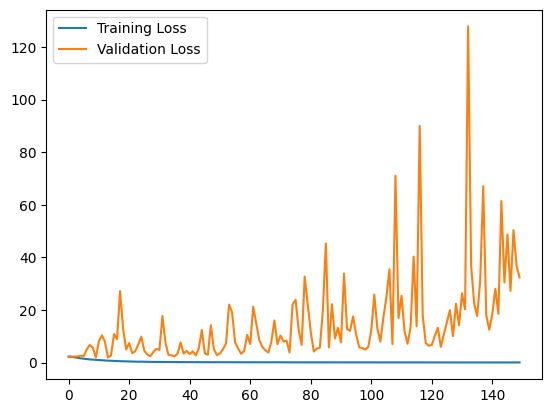

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Load all models
import keras

mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")
mfcc_model = keras.models.load_model(save_path+"/mfcc_model_.keras")
zc_model = keras.models.load_model(save_path+"/zero_crossing_rate_model_.keras")

In [ ]:
# Model Ensembling
from keras.models import Model
from keras import layers

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    model_outputs=[model(model_input) for model in models]
    # averaging outputs
    ensemble_output=layers.average(model_outputs)
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=ensemble_output,    name='ensemble')

    return modelEns

In [ ]:
from keras.layers import Input  # Correct import for Input
from keras.models import Model  # Ensure you have this for model creation

# Assuming ensembleModels is defined elsewhere
models = [mp_model, mfcc_model, zc_model]

model_input = Input(shape=models[0].input_shape[1:])  # c*h*w
modelEns = ensembleModels(models, model_input)  # Assuming this function is implemented
modelEns.summary()

modelEns.save(save_path + "/ensemble_.keras", include_optimizer=True)

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[5][0],    │
│                           │                        │                │ sequential_9[5][0],    │
│                           │                        │                │ sequential_10[5][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
from keras.models import load_model

# Load the model
model = load_model(save_path + "/ensemble_.keras")

# Compile the model (use the same loss and metrics as during training)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Evaluate the model
test_accuracy = model.evaluate(x_test, test_y)[1]
print("Test Accuracy is ", test_accuracy)


Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_10[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

ValueError: Cannot get result() since the metric has not yet been built.

In [ ]:
print("Metrics:", model.metrics_names)  # This should list the metrics


Metrics: ['loss', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'compile_metrics']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

def evaluateAll(model, x_test, test_y):
  label_as_binary = LabelBinarizer()
  test_y = label_as_binary.fit_transform(test_y)
  return model.evaluate(x_test,test_y)



In [ ]:
#Test data
import keras

path = '/content/drive/MyDrive/processed_data/audd'

x_test = np.load(path+"/x_melspectrogram_test.npy",allow_pickle=True)
y_test = np.load(path+"/y_melspectrogram_test.npy",allow_pickle=True)


mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")

model_result = evaluateAll(mp_model, x_test, y_test)
print(model_result)
print("model history ", mp_model.history)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1075 - loss: 2.2746
[2.26497220993042, 0.11619919538497925]
model history  <keras.src.callbacks.history.History object at 0x79556847a3b0>
